## 

## 文档内容

1. 前言和目录
2. Python基础
3. 数据读取
4. [Python的数学基础：numpy](#四、Python的数学基础：numpy)
5. [数据清洗/数据处理：pandas](#五、数据清洗/数据处理：pandas)
6. [连续数学：scipy](#六、连续数学：scipy)
7. 符号/符号计算：sympy
8. 离散事件仿真：simpy
9. 绘图：matplotlib & seaborn

上面的超链接提供一键直达

## 其他

文档同步开源到Github：
https://github.com/hail-linda/Scientific-computing-2-hours-in-Python

 对于后半部分的这些外部模块，将不再进行细致的函数描述和讲解。但是会引入一些别人写的比较好的教程，同时配合一些解释和例子。

## 四、Python的数学基础：numpy

先上几份链接：

numpy中文网 ：https://www.numpy.org.cn/user/

菜鸟教程numpy教程 ： https://www.runoob.com/numpy/numpy-tutorial.html

一份github上的numpy可视化教程：https://jalammar.github.io/visual-numpy/



NumPy(Numerical Python) 是 Python 语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。

NumPy和Matlab具有很强的相似性，对于从Matlab转到Python的各位同学来说，使用NumPy可能会是比较容易的一种科学计算上手手段。

首先我们先通过一行代码来引入NumPy这个库一般情况下会把定义一个别称叫做np

In [2]:
import numpy as np

我们可以很容易的通过一个列表或者是多层列表,来产生一个numpy中的数组叫array

In [13]:
listSize = 3
threeDList = []
for i in range(listSize):
    twoDList = []
    for j in range(listSize):
        numList = []
        for k in range(listSize):
            numList.append(i+j+k)
        twoDList.append(numList)
    threeDList.append(twoDList)
    
print(numList)
print(twoDList)
print(threeDList)

print(np.array(numList))
print(np.array(twoDList))
print(np.array(threeDList))



[4, 5, 6]
[[2, 3, 4], [3, 4, 5], [4, 5, 6]]
[[[0, 1, 2], [1, 2, 3], [2, 3, 4]], [[1, 2, 3], [2, 3, 4], [3, 4, 5]], [[2, 3, 4], [3, 4, 5], [4, 5, 6]]]
[4 5 6]
[[2 3 4]
 [3 4 5]
 [4 5 6]]
[[[0 1 2]
  [1 2 3]
  [2 3 4]]

 [[1 2 3]
  [2 3 4]
  [3 4 5]]

 [[2 3 4]
  [3 4 5]
  [4 5 6]]]


In [26]:
np.array(threeDList)[0,1,2]

3

除此之外numpy还提供了许多其他的创建数组的办法

In [25]:
# 这段程序来自 https://www.numpy.org.cn/article/basics/python_numpy_tutorial.html#%E6%95%B0%E7%BB%84-arrays
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
                      # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
                      # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
                       # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
                      # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
                             # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"


需要注意的是，当直接使用乘号来对两个矩阵进行运算时，是矩阵中每一个元素相乘而不是矩阵中的乘法

In [22]:
threeDArray = np.array(threeDList)
threeDArray[0]*threeDArray[1]

array([[ 0,  2,  6],
       [ 2,  6, 12],
       [ 6, 12, 20]])

如果需要用到矩阵运算中的乘法需要用dot函数

In [27]:
threeDArray[0].dot(threeDArray[1])

array([[ 8, 11, 14],
       [14, 20, 26],
       [20, 29, 38]])

或者转置之后再点乘

In [28]:
threeDArray[0].T.dot(threeDArray[1])# 显然这个矩阵转置没什么用,他是一个对称阵

array([[ 8, 11, 14],
       [14, 20, 26],
       [20, 29, 38]])

更多的数学运算参考:https://www.numpy.org.cn/reference/routines/math.html#%E6%95%B0%E5%AD%A6%E5%87%BD%E6%95%B0-mathematical-functions

**实践；多元变量最小二乘法**

假设我们有一组真实数据满足以下条件：$$y = \sum_{i=1-3}w_i*x_i$$

我们根据它产生这个数据，并且添加误差。

In [79]:
w_true = np.array([25.3,14.5,67.66]).reshape(3,1)#指定系数
X = np.random.rand(12,3)*5 #随机0~5产生12组自变量
X = np.matrix(X)
X

matrix([[2.77588865, 2.72491964, 3.0337616 ],
        [3.46905442, 1.06410804, 2.82734519],
        [3.98638193, 3.05366499, 3.91077019],
        [3.24886742, 4.1057564 , 4.27535254],
        [1.08339821, 3.30263199, 2.74771354],
        [0.63612052, 3.34126467, 0.54447395],
        [4.19750678, 1.05319676, 2.77382847],
        [4.8578052 , 1.32252476, 4.29082147],
        [3.03621614, 1.38742438, 1.90084138],
        [1.25351333, 2.99621904, 3.17763642],
        [3.87344254, 0.89366448, 1.57050764],
        [3.88840189, 4.25095543, 3.00328721]])

In [81]:
Y = X.dot(w_true)+np.random.rand(12,1)*4-2 # 计算y并且加（-2~2）的误差
Y = np.matrix(Y)
Y

matrix([[313.13352875],
        [293.12421541],
        [410.21387444],
        [432.27703191],
        [263.18609862],
        [103.11007379],
        [309.37808965],
        [433.60081044],
        [226.34142347],
        [288.78323839],
        [217.9536492 ],
        [361.62186649]])

最小二乘法的公式是

$$W = (X^T X)^{-1} X^T Y$$

想知道公式怎么来自己学去

In [82]:
# 按公式来计算
W = (X.T.dot(X)).I.dot(X.T).dot(Y)
W

matrix([[25.34472969],
        [14.62669337],
        [67.54659685]])

这与我们设定的系数已经非常接近了

In [83]:
bias = W-w_true
print(bias)

[[ 0.04472969]
 [ 0.12669337]
 [-0.11340315]]


差在零点几左右，搞定收工

## 五、数据清洗/数据处理：pandas

pandas的资料超级多，这里举几个典型的例子。

Joyful Pandas ：https://cdn.jsdelivr.net/gh/datawhalechina/joyful-pandas@master/ebook/joyfulpandas.pdf

Joyful Pandas 是一份非常详尽的pandas入门手册，包括索引、分组、变形、连接等一系列在实际编程环境中可能会用到的办法。这个东西是datawhale出的一本手册，我也不太清楚他们是搜集的一些内容还是自己从头编写的，反正知识非常的丰富。入门的话可以直接从里面的例题入手，反正时间上也没几天了，你肯定全都看不完。把里面的例题能读懂，然后跑随便跑一跑试一试就可以了。

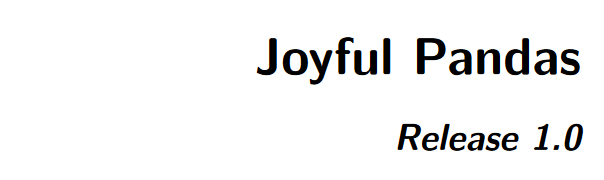

再有就是阿里云天池的一些数据分析基础入门题目。有一些没有悬赏的题目，会有比较多的公开答案发布在天池上，他们的注释和思路起来都非常的详尽，非常适合什么都不懂的小白去膜拜大佬。

比如这一份

阿里云天池大数据的一道数据分析入门题的解答：https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.15.cd7715a7zddJiZ&postId=164450

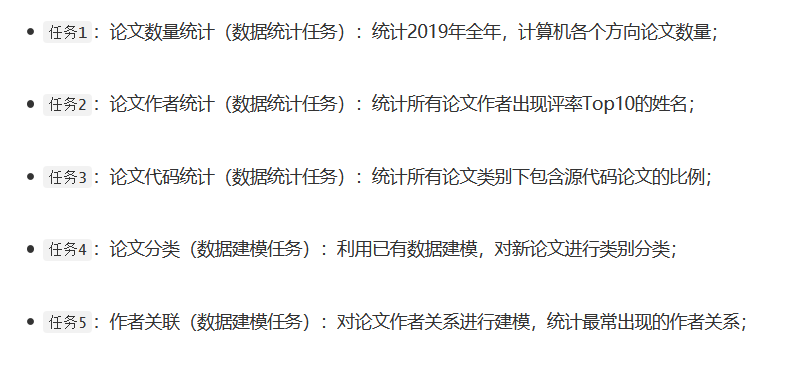

这是对应的题目链接https://tianchi.aliyun.com/competition/entrance/531866/information

还有这个

数据分析入门活动赛事，利用Pandas分析美国选民总统喜好度https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.30a239a9pu2q55&postId=137714



In [93]:
import pandas as pd
import numpy as np

data = pd.read_csv("NASA_Facilities.csv")
print(data.index)# 序号
print(data.columns)# 表头


RangeIndex(start=0, stop=485, step=1)
Index(['Center', 'Center Search Status', 'Facility', 'FacilityURL', 'Occupied',
       'Status', 'URL Link', 'Record Date', 'Last Update', 'Country',
       'Location', 'City', 'State', 'Zipcode'],
      dtype='object')


In [94]:
data.head(5) #前5行
#data.tail(5) # 后5行

,Center,Center Search Status,Facility,FacilityURL,Occupied,Status,URL Link,Record Date,Last Update,Country,Location,City,State,Zipcode
0,Stennis Space Center,Public,Test Stand A-2 #4122,NaN,01/01/1964 12:00:00 AM,Inactive,http://rockettest.nasa.gov,03/01/1996 12:00:00 AM,04/06/2015 12:00:00 AM,US,"39529-6000 (30.385948, -89.604486)",Stennis Space Center,MS,39529-6000
1,Ames Research Center,Public,N229 - EXPER. AEROTHERMODYNAMIC FAC.: ELECTRIC...,NaN,01/01/1961 12:00:00 AM,Active,http://thermo-physics.arc.nasa.gov,03/01/1996 12:00:00 AM,06/13/2014 12:00:00 AM,US,"94035 (37.41412, -122.052585)",Moffett Field,CA,94035
2,Goddard Space Flight Center,Public,"500 WSC: Antenna, 10m S-band",NaN,01/01/1977 12:00:00 AM,Active,NaN,03/01/1996 12:00:00 AM,08/15/2013 12:00:00 AM,US,"20771 (38.99538, -76.853161)",Greenbelt,MD,20771
3,Glenn Research Center,Public,Vacuum Facility 11 (VF-11) Bldg. 16,NaN,NaN,Active,http://facilities.grc.nasa.gov/epl/index.html,07/15/2010 12:00:00 AM,03/04/2015 12:00:00 AM,US,"44135 (41.430364, -81.808561)",Cleveland,OH,44135
4,Marshall Space Flight Center,Public,Materials Testing & Research Facility 4464,NaN,NaN,Active,NaN,03/08/2007 12:00:00 AM,03/31/2014 12:00:00 AM,US,"35812 (34.729538, -86.585283)",Huntsville,AL,35812


In [95]:
data.info() # 数据的统计量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Center                485 non-null    object 
 1   Center Search Status  485 non-null    object 
 2   Facility              485 non-null    object 
 3   FacilityURL           0 non-null      float64
 4   Occupied              393 non-null    object 
 5   Status                399 non-null    object 
 6   URL Link              145 non-null    object 
 7   Record Date           485 non-null    object 
 8   Last Update           479 non-null    object 
 9   Country               485 non-null    object 
 10  Location              485 non-null    object 
 11  City                  485 non-null    object 
 12  State                 485 non-null    object 
 13  Zipcode               485 non-null    object 
dtypes: float64(1), object(13)
memory usage: 53.2+ KB


In [97]:
data['State'].unique() # 相当于取set 指提取出不重复项

array(['MS', 'CA', 'MD', 'OH', 'AL', 'LA', 'TX', 'FL', 'DC', 'VA'],
      dtype=object)

In [98]:
data['State'].value_counts() # 提取出不重复项及频数

AL    136
FL     84
VA     60
CA     56
OH     42
MD     32
MS     29
DC     23
LA     17
TX      6
Name: State, dtype: int64

In [99]:
data['State'].value_counts().head(3) # 这些方法也可以取前若干行哦

AL    136
FL     84
VA     60
Name: State, dtype: int64

In [100]:
data[['Center','Location','State']]# 或者我们只对其中若干列感兴趣

,Center,Location,State
0,Stennis Space Center,"39529-6000 (30.385948, -89.604486)",MS
1,Ames Research Center,"94035 (37.41412, -122.052585)",CA
2,Goddard Space Flight Center,"20771 (38.99538, -76.853161)",MD
3,Glenn Research Center,"44135 (41.430364, -81.808561)",OH
4,Marshall Space Flight Center,"35812 (34.729538, -86.585283)",AL
...,...,...,...
480,Kennedy Space Center,"32899 (28.538331, -81.378879)",FL
481,Wallops Flight Facility/GSFC,"23337-5099 (37.911289, -75.469622)",VA
482,Kennedy Space Center,"32899 (28.538331, -81.378879)",FL
483,Langley Research Center,"23681-2199 (37.08681, -76.376649)",VA


In [103]:
dataIndex = data.set_index('State')# 以State作为索引
dataIndex.loc['MS'].head() # 提取出State==MS的数据行

,Center,Center Search Status,Facility,FacilityURL,Occupied,Status,URL Link,Record Date,Last Update,Country,Location,City,Zipcode
State,,,,,,,,,,,,,
MS,Stennis Space Center,Public,Test Stand A-2 #4122,NaN,01/01/1964 12:00:00 AM,Inactive,http://rockettest.nasa.gov,03/01/1996 12:00:00 AM,04/06/2015 12:00:00 AM,US,"39529-6000 (30.385948, -89.604486)",Stennis Space Center,39529-6000
MS,Stennis Space Center,Public,Push Boat,NaN,01/01/1965 12:00:00 AM,Active,http://rockettest.nasa.gov,03/01/1996 12:00:00 AM,04/06/2015 12:00:00 AM,US,"39529-6000 (30.385948, -89.604486)",Stennis Space Center,39529-6000
MS,Stennis Space Center,Public,Test Operations Bldg. E Complex #4010,NaN,01/01/1991 12:00:00 AM,Active,http://rockettest.nasa.gov,03/01/1996 12:00:00 AM,04/06/2015 12:00:00 AM,US,"39529-6000 (30.385948, -89.604486)",Stennis Space Center,39529-6000
MS,Stennis Space Center,Public,"Barge, Liquid Oxygen (6 each)",NaN,01/01/1965 12:00:00 AM,Active,http://rockettest.nasa.gov,03/01/1996 12:00:00 AM,04/06/2015 12:00:00 AM,US,"39529-6000 (30.385948, -89.604486)",Stennis Space Center,39529-6000
MS,Stennis Space Center,Public,Sensor Laboratory #1105,NaN,01/01/1966 12:00:00 AM,Active,NaN,03/01/1996 12:00:00 AM,04/06/2015 12:00:00 AM,US,"39529-6000 (30.385948, -89.604486)",Stennis Space Center,39529-6000


In [120]:
data.isna().sum().nlargest()#或者我们先统计一下有没有缺失数据 输出最大的5个

FacilityURL    485
URL Link       340
Occupied        92
Status          86
Last Update      6
dtype: int64

## 六、连续数学：scipy

`Scipy` 是 `Python` 中进行科学计算的一个第三方库，以 `Numpy` 为基础。

引入外部资源链接：https://nbviewer.jupyter.org/github/lijin-THU/notes-python/blob/master/04-scipy/04.01-scienticfic-python-overview.ipynb

下面给出的是两份使用的例子，都来自上面的资源链接

**最小二乘法拟合**

真实参数: [10, 0.34, 0.5235987755982988]
拟合参数 [-10.43936972   0.33939388  -2.62732135]


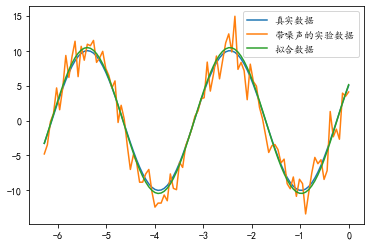

In [135]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import math


def func(x, p):
    """
 数据拟合所用的函数: A*sin(2*pi*k*x + theta)
 """
    A, k, theta = p
    return A*np.sin(2*np.pi*k*x+theta)   

def residuals(p, y, x):
    """
 实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数
 """
    return y - func(x, p)

x = np.linspace(0, -2*np.pi, 100)
A, k, theta = 10, 0.34, np.pi/6 # 真实数据的函数参数
y0 = func(x, [A, k, theta]) # 真实数据
y1 = y0 + 2 * np.random.randn(len(x)) # 加入噪声之后的实验数据 

p0 = [7, 0.2, 0] # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合参数的初始值
# args为需要拟合的实验数据
plsq = leastsq(residuals, p0, args=(y1, x))# 看看人家 把算法都内置好了 调库就完事儿了

print(u"真实参数:", [A, k, theta] )
print(u"拟合参数", plsq[0]) # 实验数据拟合后的参数

plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus']=False
plt.plot(x, y0, label=u"真实数据")
plt.plot(x, y1, label=u"带噪声的实验数据")
plt.plot(x, func(x, plsq[0]), label=u"拟合数据")
plt.legend()
plt.show()

**最小化函数**

$$d = 2 \frac{v_0^2}{g} \sin(\theta) \cos (\theta)$$

上式是斜抛运动的计算公式，目的是求出使$d$最大的$\theta$

定义距离的计算公式

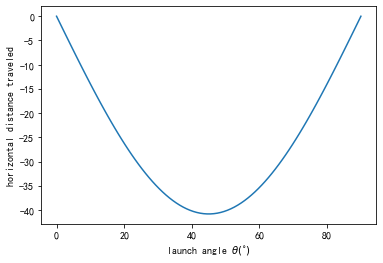

In [153]:

def dist(theta, v0):
    """calculate the distance travelled by a projectile launched
    at theta degrees with v0 (m/s) initial velocity.
    """
    g = 9.8
    theta_rad = math.pi * theta / 180
    return 2 * v0 ** 2 / g * np.sin(theta_rad) * np.cos(theta_rad) * -1

theta = np.linspace(0,90,90)

p = plt.plot(theta, dist(theta, 20.))
xl = plt.xlabel(r'launch angle $\theta (^{\circ})$')
yl = plt.ylabel('horizontal distance traveled')

In [158]:
from scipy.optimize import minimize #引入最小化函数
result = minimize(dist, 40, args=(20,))# 计算
result

      fun: -40.81632653061136
 hess_inv: array([[20.11016671]])
      jac: array([-4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([44.99999404])

从result可以看出来角度（x）的最优值为45度 扔约40米